# Assignment 1
+ Zewei Zhong 122090814

In [11]:
### Import packages for the 2 problems
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

### ignore some possible warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Problem 1

Step 1

In [12]:
### load csv file into pandas Dataframe
df = pd.DataFrame(pd.read_csv("C:/Users/Collins/Python/MachineLearning/HW1/house_prices.csv"))

### convert the data type
df["Neighborhood"] = df["Neighborhood"].astype("category")

print(df.info())
print(df.describe())      # category type would be ignored

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB
None
              SqFt    Bedrooms   Bathrooms          Price
count   128.000000  128.000000  128.000000     128.000000
mean   2000.937500    3.023438    2.445312  130427.343750
std     211.572431    0.725951    0.514492   26868.770371
min    1450.000000    2.000000    2.000000   69100.000000
25%    1880.000000    3.000000    2.000000  111325.000000
50%    2000.000000    3.000000    2.000000  125950.000000
75%    2140.000000    3.000000    3.000000  148250.000000
max    2590.000000    5.000000    4.000000  211200.000000


Step 2

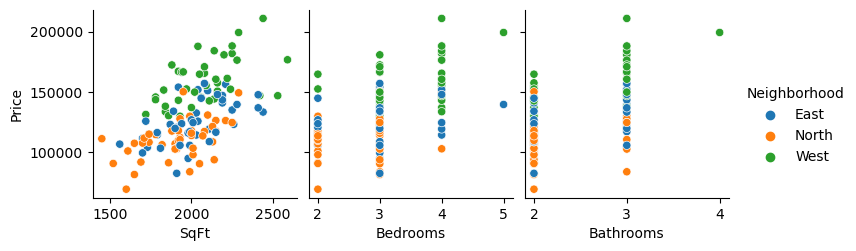

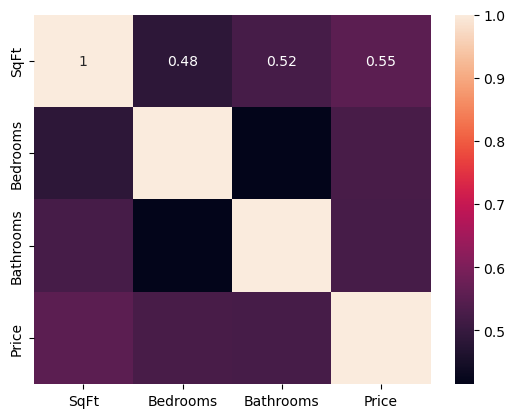

In [13]:
# sns.pairplot(df,hue="Neighborhood")
### plot Price on the other 3 variables with colors by Neighborhood variable
sns.pairplot(df, hue="Neighborhood",x_vars=["SqFt","Bedrooms","Bathrooms"], y_vars=["Price"])
plt.show()
sns.heatmap(df.drop(["Neighborhood"], axis=1).corr(), annot=True)
plt.show()

Step 3

In [14]:
### convert the category column into a one-hot numeric matrix in the dataset
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Neighborhood'])], remainder="passthrough")

X = df.drop(["Price"], axis=1)
y = df["Price"]
X_encode = np.array(ct.fit_transform(X))

### split data into train and test subset
# 80%--> train samples ;  20%--> test samples
train_X, test_X, train_y, test_y = train_test_split(X_encode, y, test_size=0.2, train_size=0.8, random_state=69)

Step 4

In [15]:
model = LinearRegression()
model.fit(train_X,train_y)

# print("intercept_:", model.intercept_)
# print("coef_:\n", model.coef_, end="\n\n")

print("Training RMSE: ", np.sqrt(mean_squared_error(train_y, model.predict(train_X))))
print("Test RMSE: ", np.sqrt(mean_squared_error(test_y, model.predict(test_X))))

Training RMSE:  14395.960374557913
Test RMSE:  15431.192673669071


# Problem 2

In [32]:
### Defining hyperparameter

# iteration times
def iter_times(train_num):
    iter_lst = [1000, 5000, 10000, 50000, 100000]
    return iter_lst[train_num]

# step size
def step_size(i, n, train_num):
    size_lst = [0.001, 0.0009, 0.0007, 0.0001, (2-i/n)/2000, (2-i/n)/10000]
    return size_lst[train_num]

# RMSE (for drawing loss decreasing curve)
def rmse(ytrue, ypred):   # the order of 2 value is not important
    return np.sqrt(mean_squared_error(ytrue, ypred))

### 10 training iteration_times & step_sizes choice
train_lst = [(0,0), (0,2), (0,3), (2,0), (3,0), (2,3), (0,4), (0,5), (2,4), (2,5)]
## Used to map the training

### creat dataset
diabetes = load_diabetes()

Step 1 & Step 2: Gradient Descend and spliting training and testing data and report the errors (in a function)

- I merge the 2 steps up for consistency of the codes

In [33]:
### Construct training data
X, y = diabetes.data, diabetes.target
y = y.reshape(y.shape[0],1)             # adjustment for shape format of y
X_b = np.c_[np.ones(X.shape[0]), X]     
## take the bias term in since numpy won't automatically cover that as in sklearn.Linear_Regression

### inital w
w = np.random.randn(X_b.shape[1],1) 

### split training data
data_for_train = train_test_split(X_b, y, train_size=0.8, random_state=69)


### balabalala
def gradient_descend(data_for_train, w, time, train_lst):
    X_train, X_test, y_train, y_test = data_for_train

    location_x = []      # collecting loss decreasing locations
    location_y = []

    n = iter_times(train_lst[time][0])
    for i in range(n):
        gradient = X_train.T @ (X_train@w - y_train)
        w = w - gradient*step_size(i, n, train_lst[time][1])

        ### collect data for drawing loss decreasing graph
        location_x.append(i+1)
        location_y.append(rmse(y_train, X_train@w))

    print("The {}-th training obtains RMSE in training samples of {}\n                            and in testing samples of {}.".format(time+1, rmse(y_train, X_train@w), rmse(y_test, X_test@w)))
    
    ### plot the loss function
    plt.title("The {}-th training".format(time+1))
    plt.plot(location_x, location_y)
    plt.show()

Step 3: Repeat for 10 times with different parameters using loop

The iteration times and stepsizes of each training are:
1.  1000,  0.001
2.  1000,  0.0007
3.  1000,  0.0001
4.  5000,  0.001
5. 10000,  0.001
6.  5000,  0.0001
7.  1000,  (2-1/n)/2000  > 0.0005
8.  1000,  (2-1/n)/10000 > 0.0001
9.  5000,  (2-1/n)/2000
10. 5000,  (2-1/n)/10000

The 1-th training obtains RMSE in training samples of 57.33788404107993
                            and in testing samples of 49.305013601864914.


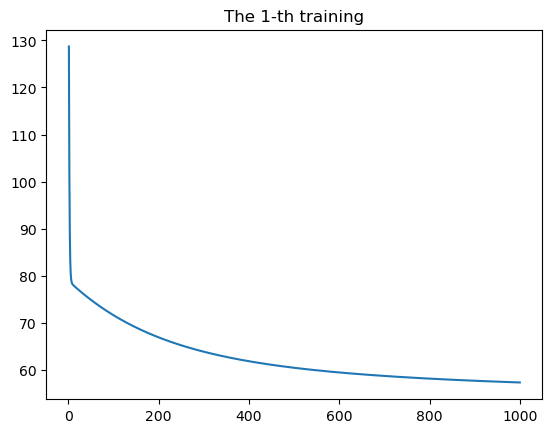

The 2-th training obtains RMSE in training samples of 58.72572739948697
                            and in testing samples of 50.33303691098585.


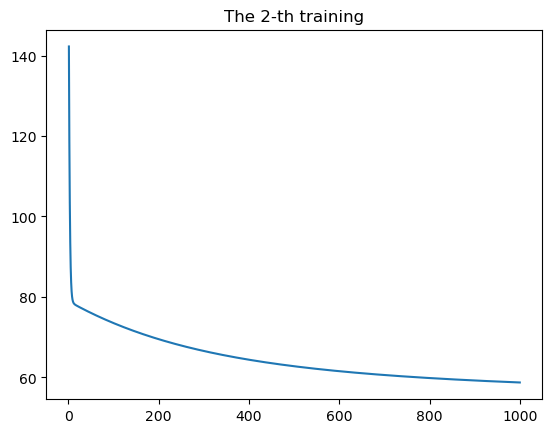

The 3-th training obtains RMSE in training samples of 71.62226563669337
                            and in testing samples of 61.14648350497135.


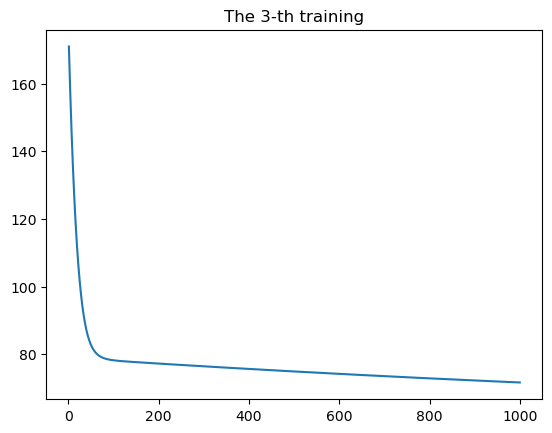

The 4-th training obtains RMSE in training samples of 55.330188395779544
                            and in testing samples of 47.116467122545586.


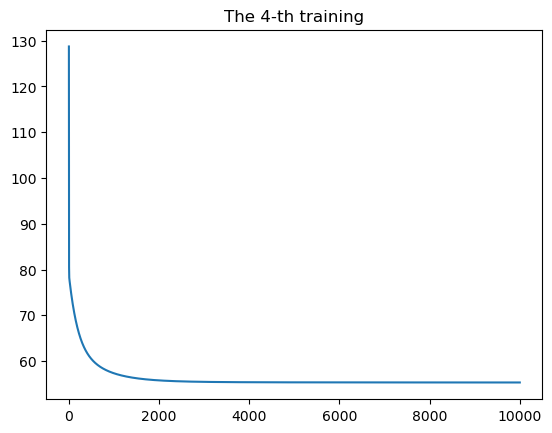

The 5-th training obtains RMSE in training samples of 55.25481863547041
                            and in testing samples of 47.078024783161595.


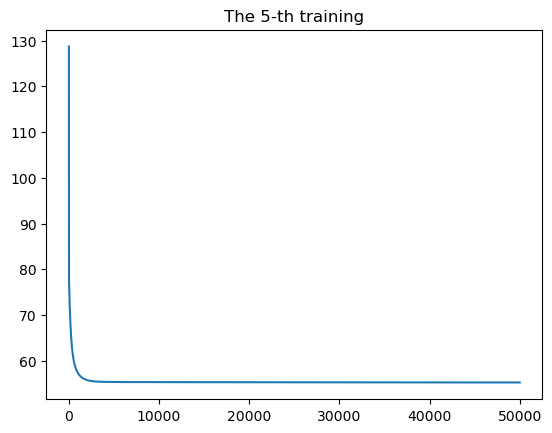

The 6-th training obtains RMSE in training samples of 57.33938190315209
                            and in testing samples of 49.30543162436118.


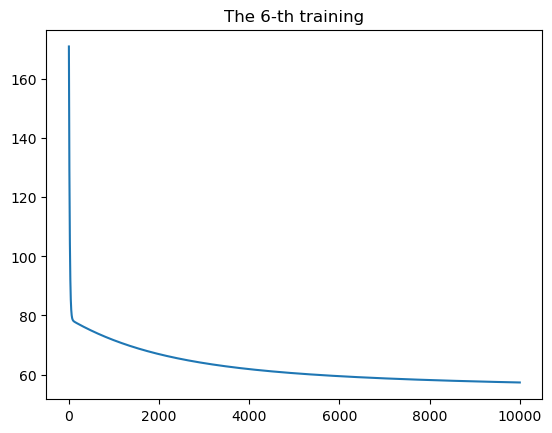

The 7-th training obtains RMSE in training samples of 58.42152954374345
                            and in testing samples of 50.12094128495148.


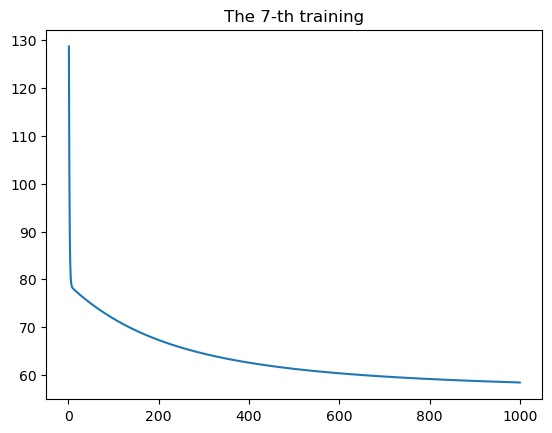

The 8-th training obtains RMSE in training samples of 69.01078071574959
                            and in testing samples of 58.64410200302836.


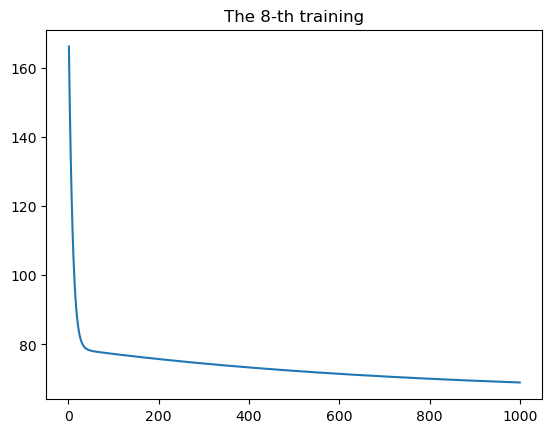

The 9-th training obtains RMSE in training samples of 55.339019493165864
                            and in testing samples of 47.11352621540576.


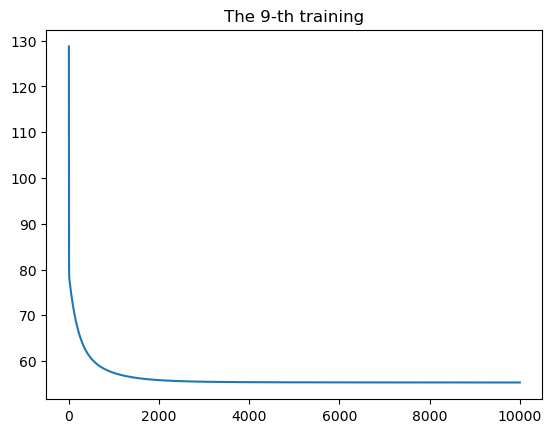

The 10-th training obtains RMSE in training samples of 56.2557085159304
                            and in testing samples of 48.28826369116446.


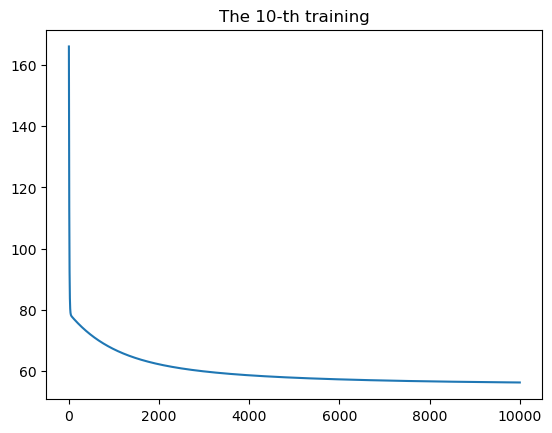

In [34]:
for time in range(0,10):
    gradient_descend(data_for_train, w, time, train_lst)